Setup

In [3]:
import pandas as pd
import time

data = pd.read_csv("../tutorials/ames_housing/data.csv")
data = data[data.GrLivArea < 4000]
y = data["SalePrice"]
X_orig = data.drop("SalePrice", axis="columns")
descriptions_df = pd.read_csv("../tutorials/ames_housing/feature_descriptions.csv")
descriptions = descriptions_df.set_index("Name").to_dict()["Description"]

Experimental condition: using Pyreal

Trying to unpickle estimator Ridge from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Ridge from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


runtime: 0.21799921989440918


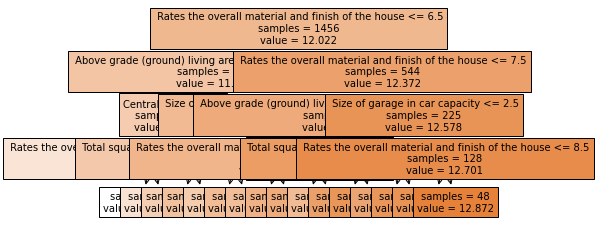

In [4]:
from pyreal.transformers import Transformer, OneHotEncoder, fit_transformers
from pyreal.explainers import DecisionTreeExplainer
start = time.time()
class AmesHousingImputer(Transformer):
    def data_transform(self, x):
            x_transform = x.copy()
            x_transform.loc[:, "Alley"] = x_transform.loc[:, "Alley"].fillna("None")
            x_transform.loc[:, "BedroomAbvGr"] = x_transform.loc[:, "BedroomAbvGr"].fillna(0)
            x_transform.loc[:, "BsmtQual"] = x_transform.loc[:, "BsmtQual"].fillna("No")
            x_transform.loc[:, "BsmtCond"] = x_transform.loc[:, "BsmtCond"].fillna("No")
            x_transform.loc[:, "BsmtExposure"] = x_transform.loc[:, "BsmtExposure"].fillna("No")
            x_transform.loc[:, "BsmtFinType1"] = x_transform.loc[:, "BsmtFinType1"].fillna("No")
            x_transform.loc[:, "BsmtFinType2"] = x_transform.loc[:, "BsmtFinType2"].fillna("No")
            x_transform.loc[:, "BsmtFullBath"] = x_transform.loc[:, "BsmtFullBath"].fillna(0)
            x_transform.loc[:, "BsmtHalfBath"] = x_transform.loc[:, "BsmtHalfBath"].fillna(0)
            x_transform.loc[:, "BsmtUnfSF"] = x_transform.loc[:, "BsmtUnfSF"].fillna(0)
            x_transform.loc[:, "CentralAir"] = x_transform.loc[:, "CentralAir"].fillna("N")
            x_transform.loc[:, "Condition1"] = x_transform.loc[:, "Condition1"].fillna("Norm")
            x_transform.loc[:, "Condition2"] = x_transform.loc[:, "Condition2"].fillna("Norm")
            x_transform.loc[:, "EnclosedPorch"] = x_transform.loc[:, "EnclosedPorch"].fillna(0)
            x_transform.loc[:, "ExterCond"] = x_transform.loc[:, "ExterCond"].fillna("TA")
            x_transform.loc[:, "ExterQual"] = x_transform.loc[:, "ExterQual"].fillna("TA")
            x_transform.loc[:, "Fence"] = x_transform.loc[:, "Fence"].fillna("No")
            x_transform.loc[:, "FireplaceQu"] = x_transform.loc[:, "FireplaceQu"].fillna("No")
            x_transform.loc[:, "Fireplaces"] = x_transform.loc[:, "Fireplaces"].fillna(0)
            x_transform.loc[:, "Functional"] = x_transform.loc[:, "Functional"].fillna("Typ")
            x_transform.loc[:, "GarageType"] = x_transform.loc[:, "GarageType"].fillna("No")
            x_transform.loc[:, "GarageFinish"] = x_transform.loc[:, "GarageFinish"].fillna("No")
            x_transform.loc[:, "GarageQual"] = x_transform.loc[:, "GarageQual"].fillna("No")
            x_transform.loc[:, "GarageCond"] = x_transform.loc[:, "GarageCond"].fillna("No")
            x_transform.loc[:, "GarageArea"] = x_transform.loc[:, "GarageArea"].fillna(0)
            x_transform.loc[:, "GarageCars"] = x_transform.loc[:, "GarageCars"].fillna(0)
            x_transform.loc[:, "HalfBath"] = x_transform.loc[:, "HalfBath"].fillna(0)
            x_transform.loc[:, "HeatingQC"] = x_transform.loc[:, "HeatingQC"].fillna("TA")
            x_transform.loc[:, "KitchenAbvGr"] = x_transform.loc[:, "KitchenAbvGr"].fillna(0)
            x_transform.loc[:, "KitchenQual"] = x_transform.loc[:, "KitchenQual"].fillna("TA")
            x_transform.loc[:, "LotFrontage"] = x_transform.loc[:, "LotFrontage"].fillna(0)
            x_transform.loc[:, "LotShape"] = x_transform.loc[:, "LotShape"].fillna("Reg")
            x_transform.loc[:, "MasVnrType"] = x_transform.loc[:, "MasVnrType"].fillna("None")
            x_transform.loc[:, "MasVnrArea"] = x_transform.loc[:, "MasVnrArea"].fillna(0)
            x_transform.loc[:, "MiscFeature"] = x_transform.loc[:, "MiscFeature"].fillna("No")
            x_transform.loc[:, "MiscVal"] = x_transform.loc[:, "MiscVal"].fillna(0)
            x_transform.loc[:, "OpenPorchSF"] = x_transform.loc[:, "OpenPorchSF"].fillna(0)
            x_transform.loc[:, "PavedDrive"] = x_transform.loc[:, "PavedDrive"].fillna("N")
            x_transform.loc[:, "PoolQC"] = x_transform.loc[:, "PoolQC"].fillna("No")
            x_transform.loc[:, "PoolArea"] = x_transform.loc[:, "PoolArea"].fillna(0)
            x_transform.loc[:, "SaleCondition"] = x_transform.loc[:, "SaleCondition"].fillna("Normal")
            x_transform.loc[:, "ScreenPorch"] = x_transform.loc[:, "ScreenPorch"].fillna(0)
            x_transform.loc[:, "TotRmsAbvGrd"] = x_transform.loc[:, "TotRmsAbvGrd"].fillna(0)
            x_transform.loc[:, "Utilities"] = x_transform.loc[:, "Utilities"].fillna("AllPub")
            x_transform.loc[:, "WoodDeckSF"] = x_transform.loc[:, "WoodDeckSF"].fillna(0)
            x_transform.loc[:, "Electrical"] = x_transform.loc[:, "Electrical"].fillna("SBrkr")
            x_num = x_transform.select_dtypes(exclude=["object"])
            x_cat = x_transform.select_dtypes(include=["object"])
            x_num = x_num.fillna(x_num.median())
            return pd.concat([x_num, x_cat], axis=1)
object_columns = X_orig.select_dtypes(include=["object"]).columns
transformers = [AmesHousingImputer(), OneHotEncoder(object_columns)]
fit_transformers(transformers, X_orig)
dte = DecisionTreeExplainer(model="../tutorials/ames_housing/model.pkl", x_train_orig=X_orig, is_classifier=False, max_depth=4, transformers=transformers, feature_descriptions=descriptions, fit_on_init=True)
pyreal_explanation = dte.produce()
print("runtime:", time.time()-start)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(pyreal_explanation, feature_names=dte.return_features(), impurity=False, fontsize=10, filled=True)
plt.show()

No pyreal condition

(1456, 301)
runtime: 0.07399964332580566


Trying to unpickle estimator Ridge from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


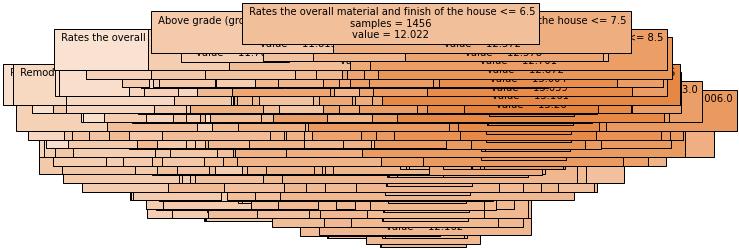

In [5]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn import tree
import pickle

start = time.time()
def ames_transform(x):
        x_transform = x.copy()
        x_transform.loc[:, "Alley"] = x_transform.loc[:, "Alley"].fillna("None")
        x_transform.loc[:, "BedroomAbvGr"] = x_transform.loc[:, "BedroomAbvGr"].fillna(0)
        x_transform.loc[:, "BsmtQual"] = x_transform.loc[:, "BsmtQual"].fillna("No")
        x_transform.loc[:, "BsmtCond"] = x_transform.loc[:, "BsmtCond"].fillna("No")
        x_transform.loc[:, "BsmtExposure"] = x_transform.loc[:, "BsmtExposure"].fillna("No")
        x_transform.loc[:, "BsmtFinType1"] = x_transform.loc[:, "BsmtFinType1"].fillna("No")
        x_transform.loc[:, "BsmtFinType2"] = x_transform.loc[:, "BsmtFinType2"].fillna("No")
        x_transform.loc[:, "BsmtFullBath"] = x_transform.loc[:, "BsmtFullBath"].fillna(0)
        x_transform.loc[:, "BsmtHalfBath"] = x_transform.loc[:, "BsmtHalfBath"].fillna(0)
        x_transform.loc[:, "BsmtUnfSF"] = x_transform.loc[:, "BsmtUnfSF"].fillna(0)
        x_transform.loc[:, "CentralAir"] = x_transform.loc[:, "CentralAir"].fillna("N")
        x_transform.loc[:, "Condition1"] = x_transform.loc[:, "Condition1"].fillna("Norm")
        x_transform.loc[:, "Condition2"] = x_transform.loc[:, "Condition2"].fillna("Norm")
        x_transform.loc[:, "EnclosedPorch"] = x_transform.loc[:, "EnclosedPorch"].fillna(0)
        x_transform.loc[:, "ExterCond"] = x_transform.loc[:, "ExterCond"].fillna("TA")
        x_transform.loc[:, "ExterQual"] = x_transform.loc[:, "ExterQual"].fillna("TA")
        x_transform.loc[:, "Fence"] = x_transform.loc[:, "Fence"].fillna("No")
        x_transform.loc[:, "FireplaceQu"] = x_transform.loc[:, "FireplaceQu"].fillna("No")
        x_transform.loc[:, "Fireplaces"] = x_transform.loc[:, "Fireplaces"].fillna(0)
        x_transform.loc[:, "Functional"] = x_transform.loc[:, "Functional"].fillna("Typ")
        x_transform.loc[:, "GarageType"] = x_transform.loc[:, "GarageType"].fillna("No")
        x_transform.loc[:, "GarageFinish"] = x_transform.loc[:, "GarageFinish"].fillna("No")
        x_transform.loc[:, "GarageQual"] = x_transform.loc[:, "GarageQual"].fillna("No")
        x_transform.loc[:, "GarageCond"] = x_transform.loc[:, "GarageCond"].fillna("No")
        x_transform.loc[:, "GarageArea"] = x_transform.loc[:, "GarageArea"].fillna(0)
        x_transform.loc[:, "GarageCars"] = x_transform.loc[:, "GarageCars"].fillna(0)
        x_transform.loc[:, "HalfBath"] = x_transform.loc[:, "HalfBath"].fillna(0)
        x_transform.loc[:, "HeatingQC"] = x_transform.loc[:, "HeatingQC"].fillna("TA")
        x_transform.loc[:, "KitchenAbvGr"] = x_transform.loc[:, "KitchenAbvGr"].fillna(0)
        x_transform.loc[:, "KitchenQual"] = x_transform.loc[:, "KitchenQual"].fillna("TA")
        x_transform.loc[:, "LotFrontage"] = x_transform.loc[:, "LotFrontage"].fillna(0)
        x_transform.loc[:, "LotShape"] = x_transform.loc[:, "LotShape"].fillna("Reg")
        x_transform.loc[:, "MasVnrType"] = x_transform.loc[:, "MasVnrType"].fillna("None")
        x_transform.loc[:, "MasVnrArea"] = x_transform.loc[:, "MasVnrArea"].fillna(0)
        x_transform.loc[:, "MiscFeature"] = x_transform.loc[:, "MiscFeature"].fillna("No")
        x_transform.loc[:, "MiscVal"] = x_transform.loc[:, "MiscVal"].fillna(0)
        x_transform.loc[:, "OpenPorchSF"] = x_transform.loc[:, "OpenPorchSF"].fillna(0)
        x_transform.loc[:, "PavedDrive"] = x_transform.loc[:, "PavedDrive"].fillna("N")
        x_transform.loc[:, "PoolQC"] = x_transform.loc[:, "PoolQC"].fillna("No")
        x_transform.loc[:, "PoolArea"] = x_transform.loc[:, "PoolArea"].fillna(0)
        x_transform.loc[:, "SaleCondition"] = x_transform.loc[:, "SaleCondition"].fillna("Normal")
        x_transform.loc[:, "ScreenPorch"] = x_transform.loc[:, "ScreenPorch"].fillna(0)
        x_transform.loc[:, "TotRmsAbvGrd"] = x_transform.loc[:, "TotRmsAbvGrd"].fillna(0)
        x_transform.loc[:, "Utilities"] = x_transform.loc[:, "Utilities"].fillna("AllPub")
        x_transform.loc[:, "WoodDeckSF"] = x_transform.loc[:, "WoodDeckSF"].fillna(0)
        x_transform.loc[:, "Electrical"] = x_transform.loc[:, "Electrical"].fillna("SBrkr")
        x_num = x_transform.select_dtypes(exclude=["object"])
        x_cat = x_transform.select_dtypes(include=["object"])
        x_num = x_num.fillna(x_num.median())
        return pd.concat([x_num, x_cat], axis=1)
X_explain = ames_transform(X_orig)
columns_to_encode = X_explain.select_dtypes(include=["object"]).columns
to_encode = X_explain[columns_to_encode]
ohe = SklearnOneHotEncoder(sparse=False).fit(to_encode)
encoded_columns = ohe.get_feature_names(to_encode.columns)
index = to_encode.index
encoded = ohe.transform(to_encode)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=index)
X_explain = pd.concat([X_explain.drop(columns_to_encode, axis="columns"), encoded_df], axis=1)
print(X_explain.shape)
sklearn_explanation = tree.DecisionTreeRegressor()
model = pickle.load(open("../tutorials/ames_housing/model.pkl", "rb"))
results = model.predict(X_explain)
sklearn_explanation.fit(X_explain, model.predict(X_explain))
print("runtime:", time.time()-start)

plot_tree(sklearn_explanation, feature_names=dte.return_features(), impurity=False, fontsize=10, filled=True)
plt.show()